In [17]:
import pandas as pd

In [18]:
df = pd.read_csv("Input/creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [19]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']] = scaler.fit_transform(df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']])

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='Class'), 
                                                    df['Class'], 
                                                    stratify=df['Class'], 
                                                    random_state=1)

In [22]:
from sklearn import svm
from sklearn.metrics import accuracy_score
clf = svm.SVC()
clf.fit(X_train, y_train)
y_test_predict = clf.predict(X_test)

In [23]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_test_predict, target_names=['Non-churned', 'Churned'])
print(report)

              precision    recall  f1-score   support

 Non-churned       1.00      1.00      1.00     71079
     Churned       0.85      0.88      0.86       123

    accuracy                           1.00     71202
   macro avg       0.93      0.94      0.93     71202
weighted avg       1.00      1.00      1.00     71202



In [24]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=100, contamination=0.1)
y_test_predict = lof.fit_predict(df)

In [25]:
from numpy import quantile

lof = lof.negative_outlier_factor_
thresh = quantile(lof, .03)
print(thresh) 

-1.4993922837511857


# Автоэнкодер

In [26]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
def tsne_plot(X, y):
    tsne = TSNE(n_components=2)
    X_transformed = tsne.fit_transform(X)
    plt.figure(figsize=(12, 8))
    plt.scatter(
        X_transformed[np.where(y == 0), 0],
        X_transformed[np.where(y == 0), 1],
        marker='o',
        color='g',
        linewidth=1,alpha=0.8 )
    plt.scatter(
        X_transformed[np.where(y == 1), 0],
        X_transformed[np.where(y == 1), 1],
        marker='o',
        color='r',
        linewidth=1,
        alpha=0.8 )
    plt.show()

In [27]:
dataset = df

C:\Users\mrdmi\AppData\Local\Temp\ipykernel_10540\1003560103.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset_subsample = anomaly_entries.append(regular_sample)


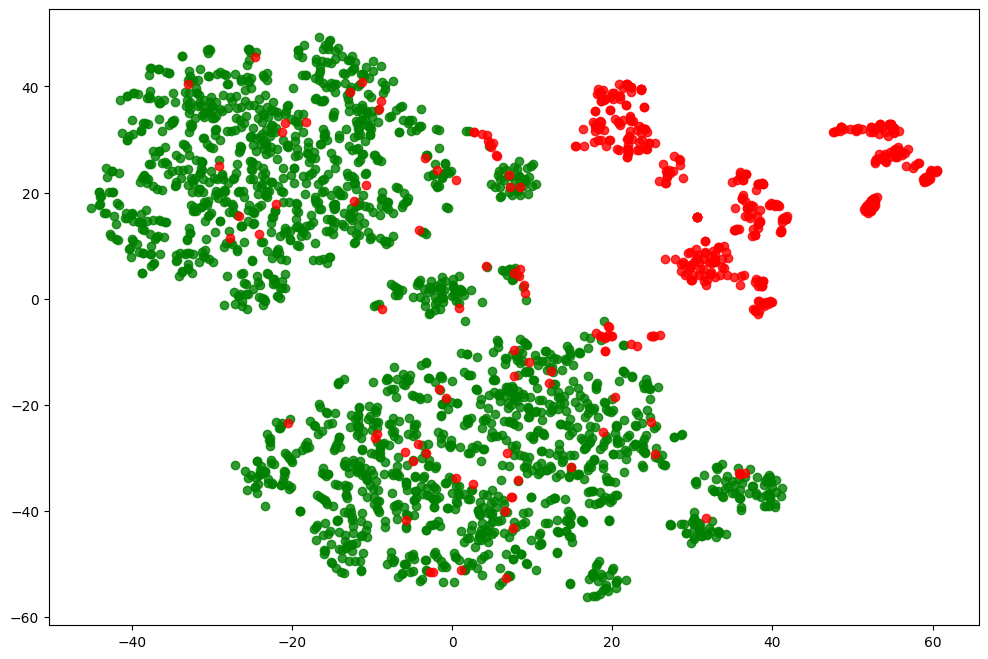

In [28]:
from sklearn.manifold import TSNE
anomaly_entries = dataset[dataset['Class'] == 1]
regular_entries = dataset[dataset['Class'] == 0]
subsample_size = 2000
regular_sample = regular_entries.sample(n=subsample_size)
dataset_subsample = anomaly_entries.append(regular_sample)
X_subsample = dataset_subsample.drop(columns=['Class']).values
y_subsample = dataset_subsample['Class'].values

tsne_plot(X_subsample, y_subsample)

In [29]:
X = df

In [30]:
from tensorflow.keras import layers, losses, metrics, optimizers, regularizers
from tensorflow.keras.models import Model
input_layer = layers.Input(shape=(X.shape[1],))
encoded = layers.Dense(100, activation='tanh')(input_layer)
encoded = layers.Dense(50, activation='relu')(encoded)
decoded = layers.Dense(50, activation='tanh')(encoded)
decoded = layers.Dense(100, activation='tanh')(decoded)
output_layer = layers.Dense(X.shape[1], activation='relu')(decoded)
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer='adadelta', loss='mse', metrics=['accuracy'])
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 31)]              0         
                                                                 
 dense_5 (Dense)             (None, 100)               3200      
                                                                 
 dense_6 (Dense)             (None, 50)                5050      
                                                                 
 dense_7 (Dense)             (None, 50)                2550      
                                                                 
 dense_8 (Dense)             (None, 100)               5100      
                                                                 
 dense_9 (Dense)             (None, 31)                3131      
                                                                 
Total params: 19,031
Trainable params: 19,031
Non-trainable

In [31]:
autoencoder.fit(regular_sample, regular_sample,
                batch_size = 256, epochs = 10,
                shuffle = True, validation_split = 0.20)

Epoch 1/10
7/7 [==============================] - 1s 31ms/step - loss: 0.2633 - accuracy: 6.2500e-04 - val_loss: 0.2628 - val_accuracy: 0.0000e+00
Epoch 2/10
7/7 [==============================] - 0s 7ms/step - loss: 0.2630 - accuracy: 6.2500e-04 - val_loss: 0.2625 - val_accuracy: 0.0000e+00
Epoch 3/10
7/7 [==============================] - 0s 7ms/step - loss: 0.2627 - accuracy: 6.2500e-04 - val_loss: 0.2622 - val_accuracy: 0.0000e+00
Epoch 4/10
7/7 [==============================] - 0s 7ms/step - loss: 0.2624 - accuracy: 6.2500e-04 - val_loss: 0.2619 - val_accuracy: 0.0000e+00
Epoch 5/10
7/7 [==============================] - 0s 7ms/step - loss: 0.2621 - accuracy: 6.2500e-04 - val_loss: 0.2616 - val_accuracy: 0.0000e+00
Epoch 6/10
7/7 [==============================] - 0s 7ms/step - loss: 0.2618 - accuracy: 6.2500e-04 - val_loss: 0.2613 - val_accuracy: 0.0000e+00
Epoch 7/10
7/7 [==============================] - 0s 7ms/step - loss: 0.2615 - accuracy: 6.2500e-04 - val_loss: 0.2610 - va

In [32]:
from tensorflow.keras.models import Sequential
autoencoder_encode = Sequential()
autoencoder_encode.add(autoencoder.layers[0])
autoencoder_encode.add(autoencoder.layers[1])
autoencoder_encode.add(autoencoder.layers[2])
X_encoded = autoencoder_encode.predict(X_subsample)
tsne_plot(X_encoded, y_subsample)

ValueError: in user code:

    File "C:\Users\mrdmi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\mrdmi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\mrdmi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\mrdmi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2111, in predict_step
        return self(x, training=False)
    File "C:\Users\mrdmi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\mrdmi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 31), found shape=(None, 30)
